In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error

In [91]:
classical = pd.read_csv('classical.csv', header=None)
classical.rename(columns={0: 'u', 1: 'n1-n2', 2:'z_u'}, inplace=True)
classical=classical.sort_values('u')
classical['measurement']=classical['z_u']**2/256
classical

,u,n1-n2,z_u,measurement
0,00000000 00000000,256,1.000000,3.906250e-03
256,00000000 00000001,228,0.890625,3.098488e-03
512,00000000 00000010,6,0.023438,2.145859e-06
768,00000000 00000011,0,0.000000,0.000000e+00
1024,00000000 00000100,96,0.375000,5.493164e-04
...,...,...,...,...
64511,11111111 11111011,10,0.039063,5.960617e-06
64767,11111111 11111100,16,0.062500,1.525879e-05
65023,11111111 11111101,26,0.101563,4.029314e-05
65279,11111111 11111110,18,0.070313,1.931218e-05


In [88]:
with open('output_counts_102400.json') as f:
  my_dict = json.loads(f.read())

In [92]:
quantum=pd.Series(my_dict).to_frame().reset_index()
quantum.rename(columns={'index': 'u', 0:'counts'}, inplace=True)
quantum=quantum.sort_values('u')
quantum['measurement']=quantum['counts']/(102400)
quantum.drop('counts', axis=1, inplace=True)
quantum

,u,measurement
402,00000000 00000000,0.003906
1616,00000001 00001100,0.000889
2027,00000001 00001101,0.000879
2526,00000001 00001110,0.001094
1945,00000001 00001111,0.000869
...,...,...
8448,11111111 11101000,0.000039
3635,11111111 11101001,0.000010
13307,11111111 11101010,0.000010
7951,11111111 11101101,0.000010


In [94]:
combined = pd.merge(classical, quantum, on="u")
combined.drop(columns=['n1-n2','z_u'], inplace=True)
combined['diff']=combined['measurement_x']-combined['measurement_y']
combined['abs_diff']=abs(combined['diff'])
combined

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,3.906250e-03,0.003906,0.000000,0.000000
1,00000001 00001100,5.960617e-06,0.000889,-0.000883,0.000883
2,00000001 00001101,2.145859e-06,0.000879,-0.000877,0.000877
3,00000001 00001110,5.364464e-05,0.001094,-0.001040,0.001040
4,00000001 00001111,4.029314e-05,0.000869,-0.000829,0.000829
...,...,...,...,...,...
15801,11111111 11101000,3.814697e-06,0.000039,-0.000035,0.000035
15802,11111111 11101001,8.583069e-06,0.000010,-0.000001,0.000001
15803,11111111 11101010,1.168272e-05,0.000010,0.000002,0.000002
15804,11111111 11101101,9.536743e-07,0.000010,-0.000009,0.000009


In [95]:
combined.describe()

,measurement_x,measurement_y,diff,abs_diff
count,1.580600e+04,15806.000000,15806.000000,15806.000000
mean,1.388819e-05,0.000063,-0.000049,0.000058
std,4.301993e-05,0.000097,0.000096,0.000091
min,0.000000e+00,0.000010,-0.001180,0.000000
25%,9.536743e-07,0.000020,-0.000059,0.000014
50%,3.814697e-06,0.000039,-0.000027,0.000029
75%,1.525879e-05,0.000068,-0.000009,0.000063
max,3.906250e-03,0.003906,0.000635,0.001180


In [96]:
mean_squared_error(combined['measurement_x'], combined['measurement_y'])

1.1723465470193837e-08

In [97]:
combined.loc[round(combined['measurement_x'],6)==round(combined['measurement_y'],6)]
# no values that are exactly equal

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,0.003906,0.003906,0.000000e+00,0.000000e+00
186,00001011 01100011,0.000029,0.000029,-4.478912e-07,4.478912e-07
511,00011010 01101100,0.000029,0.000029,-4.478912e-07,4.478912e-07
1065,00100111 01100010,0.000029,0.000029,-4.478912e-07,4.478912e-07
1883,00110101 01101001,0.000029,0.000029,-4.478912e-07,4.478912e-07
1999,00110111 00100001,0.000029,0.000029,-4.478912e-07,4.478912e-07
2792,01001000 01011100,0.000029,0.000029,-4.478912e-07,4.478912e-07
4111,01100101 10001011,0.000029,0.000029,-4.478912e-07,4.478912e-07
4804,01101101 10010101,0.000029,0.000029,-4.478912e-07,4.478912e-07
4916,01101110 11100101,0.000029,0.000029,-4.478912e-07,4.478912e-07


In [98]:
combined.loc[round(combined['measurement_x'],4)==round(combined['measurement_y'],4)]

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,3.906250e-03,0.003906,0.000000,0.000000
19,00000011 00101100,8.583069e-06,0.000049,-0.000040,0.000040
20,00000011 00101101,5.960617e-06,0.000049,-0.000043,0.000043
21,00000011 00101110,9.536743e-07,0.000020,-0.000019,0.000019
23,00000011 00111100,5.960617e-06,0.000029,-0.000023,0.000023
...,...,...,...,...,...
15801,11111111 11101000,3.814697e-06,0.000039,-0.000035,0.000035
15802,11111111 11101001,8.583069e-06,0.000010,-0.000001,0.000001
15803,11111111 11101010,1.168272e-05,0.000010,0.000002,0.000002
15804,11111111 11101101,9.536743e-07,0.000010,-0.000009,0.000009


In [99]:
combined.loc[combined['abs_diff']<0.0001]

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,3.906250e-03,0.003906,0.000000,0.000000
19,00000011 00101100,8.583069e-06,0.000049,-0.000040,0.000040
20,00000011 00101101,5.960617e-06,0.000049,-0.000043,0.000043
21,00000011 00101110,9.536743e-07,0.000020,-0.000019,0.000019
22,00000011 00101111,9.536743e-07,0.000078,-0.000077,0.000077
...,...,...,...,...,...
15801,11111111 11101000,3.814697e-06,0.000039,-0.000035,0.000035
15802,11111111 11101001,8.583069e-06,0.000010,-0.000001,0.000001
15803,11111111 11101010,1.168272e-05,0.000010,0.000002,0.000002
15804,11111111 11101101,9.536743e-07,0.000010,-0.000009,0.000009


In [100]:
combined.loc[combined['measurement_x']==combined['measurement_y']]

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,0.003906,0.003906,0.0,0.0


In [101]:
combined.to_csv('combined_measurements.csv', index=False)

In [102]:
combined=pd.read_csv("combined_measurements.csv")
combined

,u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,3.906250e-03,0.003906,0.000000,0.000000
1,00000001 00001100,5.960617e-06,0.000889,-0.000883,0.000883
2,00000001 00001101,2.145859e-06,0.000879,-0.000877,0.000877
3,00000001 00001110,5.364464e-05,0.001094,-0.001040,0.001040
4,00000001 00001111,4.029314e-05,0.000869,-0.000829,0.000829
...,...,...,...,...,...
15801,11111111 11101000,3.814697e-06,0.000039,-0.000035,0.000035
15802,11111111 11101001,8.583069e-06,0.000010,-0.000001,0.000001
15803,11111111 11101010,1.168272e-05,0.000010,0.000002,0.000002
15804,11111111 11101101,9.536743e-07,0.000010,-0.000009,0.000009


array([[<AxesSubplot:title={'center':'diff'}>]], dtype=object)

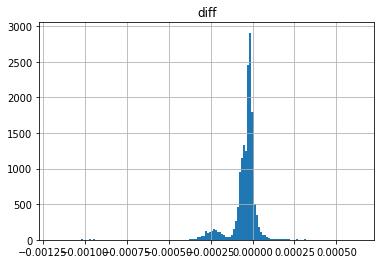

In [103]:
combined.hist(column='diff', bins=150)

In [14]:
2.165156e-03*102400
# max_error

221.7119744

In [13]:
1.406250e-07*102400
# min error

0.0144

In [9]:
1.492548e-04*102400
# mean error

15.283691520000001

#### combined: retained all data: outer join

In [104]:
combined_all = pd.merge(classical, quantum, on="u", how="left").fillna(0)
combined_all['diff']=combined_all['measurement_x']-combined_all['measurement_y']
combined_all['abs_diff']=abs(combined_all['diff'])
combined_all

,u,n1-n2,z_u,measurement_x,measurement_y,diff,abs_diff
0,00000000 00000000,256,1.000000,3.906250e-03,0.003906,0.000000e+00,0.000000e+00
1,00000000 00000001,228,0.890625,3.098488e-03,0.000000,3.098488e-03,3.098488e-03
2,00000000 00000010,6,0.023438,2.145859e-06,0.000000,2.145859e-06,2.145859e-06
3,00000000 00000011,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
4,00000000 00000100,96,0.375000,5.493164e-04,0.000000,5.493164e-04,5.493164e-04
...,...,...,...,...,...,...,...
65531,11111111 11111011,10,0.039063,5.960617e-06,0.000000,5.960617e-06,5.960617e-06
65532,11111111 11111100,16,0.062500,1.525879e-05,0.000000,1.525879e-05,1.525879e-05
65533,11111111 11111101,26,0.101563,4.029314e-05,0.000000,4.029314e-05,4.029314e-05
65534,11111111 11111110,18,0.070313,1.931218e-05,0.000000,1.931218e-05,1.931218e-05


In [105]:
mean_squared_error(combined_all['measurement_x'], combined_all['measurement_y'])

4.784574329259744e-09

In [106]:
combined_all.describe()

,n1-n2,z_u,measurement_x,measurement_y,diff,abs_diff
count,65536.000000,65536.000000,6.553600e+04,65536.000000,6.553600e+04,65536.000000
mean,11.630554,0.045432,1.529920e-05,0.000015,4.041286e-08,0.000026
std,11.018556,0.043041,4.707355e-05,0.000055,6.917113e-05,0.000064
min,0.000000,0.000000,0.000000e+00,0.000000,-1.179724e-03,0.000000
25%,4.000000,0.015625,9.536743e-07,0.000000,0.000000e+00,0.000002
50%,8.000000,0.031250,3.814697e-06,0.000000,2.145859e-06,0.000009
75%,16.000000,0.062500,1.525879e-05,0.000000,1.168272e-05,0.000027
max,256.000000,1.000000,3.906250e-03,0.003906,3.433228e-03,0.003433


array([<AxesSubplot:title={'center':'diff'}>], dtype=object)

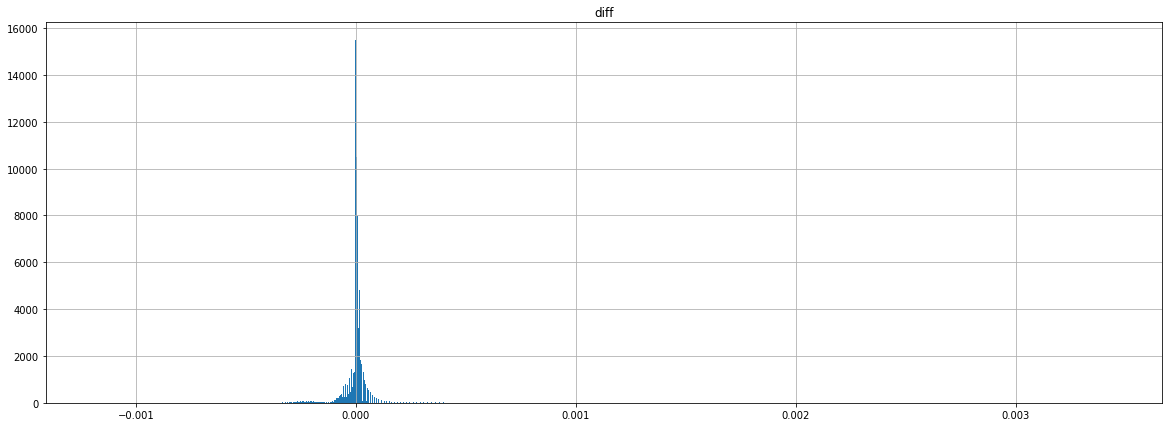

In [113]:
fig,ax = plt.subplots(figsize = (20,7))
combined_all.hist(column='diff', bins=1000, ax=ax)

In [25]:
0.003693*102400

378.1632

In [14]:
0.000168*102400

17.2032

#### threshold

In [136]:
threshold = pd.read_csv('threshold.csv', header=None)
threshold['n1-n2']=threshold[2]
threshold['z_u']=threshold[3]
threshold.drop(columns=[2,3], inplace=True, axis=1)
threshold['measurement']=threshold['z_u']**2/256
threshold['corr\'(u)']=threshold['z_u']/2
threshold

,0,1,n1-n2,z_u,measurement,corr'(u)
0,0,0,256,1.000000,3.906250e-03,0.500000
1,0,1,228,0.890625,3.098488e-03,0.445312
2,0,10,6,0.023438,2.145859e-06,0.011719
3,0,11,0,0.000000,0.000000e+00,0.000000
4,0,100,96,0.375000,5.493164e-04,0.187500
...,...,...,...,...,...,...
65531,11111111,11111011,10,0.039063,5.960617e-06,0.019532
65532,11111111,11111100,16,0.062500,1.525879e-05,0.031250
65533,11111111,11111101,26,0.101563,4.029314e-05,0.050782
65534,11111111,11111110,18,0.070313,1.931218e-05,0.035157


In [137]:
threshold_useful=threshold.copy()
threshold_useful = threshold_useful.loc[(threshold_useful[0]!=0)]
threshold_useful = threshold_useful.loc[(threshold_useful[1]!=0)]
threshold_useful

,0,1,n1-n2,z_u,measurement,corr'(u)
257,1,1,2,0.007813,2.384491e-07,0.003907
258,1,10,22,0.085938,2.884898e-05,0.042969
259,1,11,14,0.054688,1.168272e-05,0.027344
260,1,100,20,0.078125,2.384186e-05,0.039062
261,1,101,6,0.023438,2.145859e-06,0.011719
...,...,...,...,...,...,...
65531,11111111,11111011,10,0.039063,5.960617e-06,0.019532
65532,11111111,11111100,16,0.062500,1.525879e-05,0.031250
65533,11111111,11111101,26,0.101563,4.029314e-05,0.050782
65534,11111111,11111110,18,0.070313,1.931218e-05,0.035157


In [138]:
threshold.sort_values(by='n1-n2', ascending=False, inplace=True)
threshold

,0,1,n1-n2,z_u,measurement,corr'(u)
0,0,0,256,1.000000,0.003906,0.500000
80,0,1010000,240,0.937500,0.003433,0.468750
1,0,1,228,0.890625,0.003098,0.445312
68,0,1000100,218,0.851563,0.002833,0.425781
20,0,10100,214,0.835938,0.002730,0.417969
...,...,...,...,...,...,...
42534,10100110,100110,0,0.000000,0.000000,0.000000
20837,1010001,1100101,0,0.000000,0.000000,0.000000
42519,10100110,10111,0,0.000000,0.000000,0.000000
42518,10100110,10110,0,0.000000,0.000000,0.000000


In [139]:
threshold.describe()

,0,1,n1-n2,z_u,measurement,corr'(u)
count,6.553600e+04,6.553600e+04,65536.000000,65536.000000,6.553600e+04,65536.000000
mean,5.555556e+06,5.555556e+06,11.630554,0.045432,1.529920e-05,0.022716
std,5.025227e+06,5.025227e+06,11.018556,0.043041,4.707355e-05,0.021521
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,7.777778e+05,7.777778e+05,4.000000,0.015625,9.536743e-07,0.007812
50%,5.555556e+06,5.555556e+06,8.000000,0.031250,3.814697e-06,0.015625
75%,1.033333e+07,1.033333e+07,16.000000,0.062500,1.525879e-05,0.031250
max,1.111111e+07,1.111111e+07,256.000000,1.000000,3.906250e-03,0.500000


In [140]:
threshold_useful.describe()

,0,1,n1-n2,z_u,measurement,corr'(u)
count,6.502500e+04,6.502500e+04,65025.000000,65025.000000,6.502500e+04,65025.000000
mean,5.577342e+06,5.577342e+06,11.518493,0.044994,1.425996e-05,0.022497
std,5.022990e+06,5.022990e+06,10.323126,0.040325,3.055932e-05,0.020162
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000e+06,1.000000e+06,4.000000,0.015625,9.536743e-07,0.007812
50%,1.000000e+07,1.000000e+07,8.000000,0.031250,3.814697e-06,0.015625
75%,1.100000e+07,1.100000e+07,16.000000,0.062500,1.525879e-05,0.031250
max,1.111111e+07,1.111111e+07,138.000000,0.539063,1.135113e-03,0.269531


array([<AxesSubplot:title={'center':'measurement'}>], dtype=object)

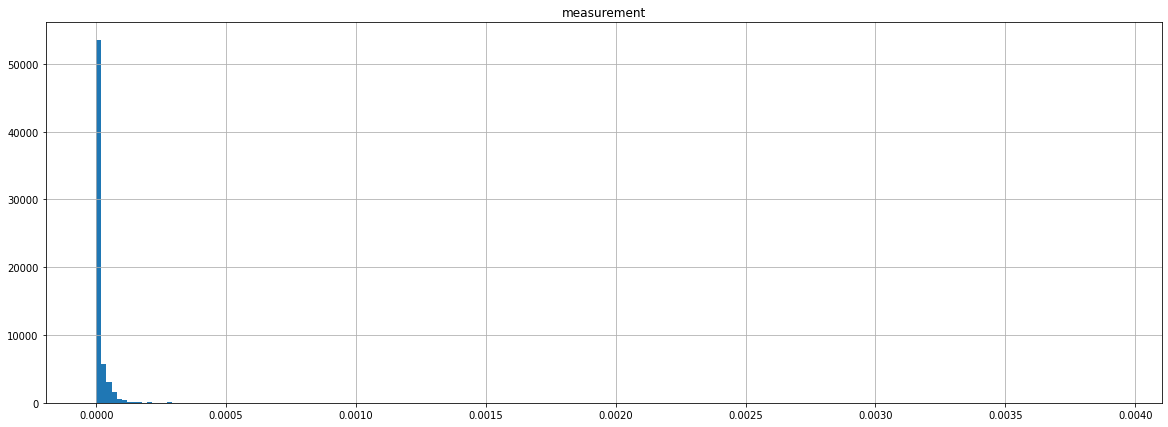

In [141]:
fig,ax = plt.subplots(figsize = (20,7))
threshold.hist(column='measurement', bins=200, ax=ax)

In [142]:
threshold[threshold['measurement']>=0.0015]

,0,1,n1-n2,z_u,measurement,corr'(u)
0,0,0,256,1.000000,0.003906,0.500000
80,0,1010000,240,0.937500,0.003433,0.468750
1,0,1,228,0.890625,0.003098,0.445312
68,0,1000100,218,0.851563,0.002833,0.425781
20,0,10100,214,0.835938,0.002730,0.417969
144,0,10010000,170,0.664063,0.001723,0.332031
192,0,11000000,162,0.632813,0.001564,0.316406


In [156]:
len(threshold[threshold['measurement']>=0.0004])

106

In [157]:
len(threshold[threshold['corr\'(u)']>=0.16])

106

In [151]:
len(threshold_useful[threshold_useful['measurement']>=0.0004])

44

In [150]:
len(threshold_useful[threshold_useful['corr\'(u)']>=0.16])

44

In [75]:
23+64979-65025

-23